# Week 2

As explained in the [Before week 1: How to take this class](https://nbviewer.org/github/suneman/socialdata2022/blob/main/lectures/How_To_Take_This_Class.ipynb) notebook, each week of this class is an Jupyter notebook like this one. In order to follow the class, you simply start reading from the top, following the instructions.

Hint: you can ask us - Anna or any of the friendly Teaching Assistants - for help at any point if you get 
stuck!

**New Info**: Remember that this week is also the time to learn a bit about how the the assignments and the final project work. So if you havn't already, check out the [Before week 2: Assignments and Final Project](https://github.com/suneman/socialdata2022/blob/main/lectures/Assignments_And_Final_Project.ipynb) notebook.

## Overview

Today's lecture has 3 parts. 
* First we'll give you an introduction to data visualization with a little data visualization exercise and a video from Sune. 
* As the main event, we will work with crime-data and generate a large number of interesting and informative plots. 
* Finally - in the last part - we'll play around with visualizing the geo-data contained in the CSV file.

## Part 1: A little visualization exercise

Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
As you will later realize, these are famous datasets!
Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  

It's ok to just download these files to disk by right-clicking on each one, but if you use Python and `urllib` or `urllib2` to get them, I'll really be impressed. If you don't know how to do that, I recommend opening up Google and typing "download file using Python" or something like that. When interpreting the search results remember that _stackoverflow_ is your friend.

Now, to the exercise:

> *Exercise 1.1*: 
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
>      * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 
> * Now calculate the variance for all of the various sets of $x$- and $y$-values, by using the `numpy` function `var`. Print it to three decimal places.
> * Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also print to three decimal places).
> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Comment on the results from the previous steps. What do you observe? 
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/anscombe.png).)
> * Explain - in your own words - what you think my point with this exercise is (see below for tips on this).


Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). Here you can also get an explanation of why the datasets are actually famous - I mean they have their own Wikipedia page!!

And the video below generalizes in the coolest way imaginable. It's a treat, but don't watch it until **after** you've done the exercises - and read the Wikipedia page. **Note:** Uncomment the line in the cell below to watch the video!

# MY CODE

In [146]:
# Imports
import os
import glob
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

Mean of x: 9.00;         mean of y: 7.50
Variance of x: 10.000;     variance of y: 3.748
Slope = 0.50, intercept = 3.00
Mean of x: 9.00;         mean of y: 7.50
Variance of x: 10.000;     variance of y: 3.752
Slope = 0.50, intercept = 3.00
Mean of x: 9.00;         mean of y: 7.50
Variance of x: 10.000;     variance of y: 3.748
Slope = 0.50, intercept = 3.00
Mean of x: 9.00;         mean of y: 7.50
Variance of x: 10.000;     variance of y: 3.752
Slope = 0.50, intercept = 3.00


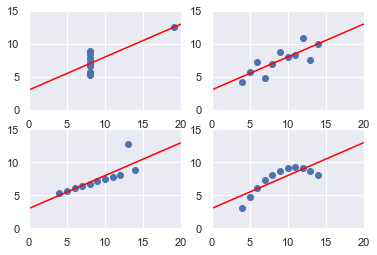

In [2]:
all_files = glob.glob('../data/data*.tsv')
df0 = pd.read_csv(all_files[0], sep='\t',names=["x","y"])
df1 = pd.read_csv(all_files[1], sep='\t',names=["x","y"])
df2 = pd.read_csv(all_files[2], sep='\t',names=["x","y"])
df3 = pd.read_csv(all_files[3], sep='\t',names=["x","y"])
dfs = [df0, df1, df2, df3]

def descriptivo(df):
    print(f"Mean of x: {np.mean(df['x']):.2f};         mean of y: {np.mean(df['y']):.2f}")
    print(f"Variance of x: {np.var(df['x']):.3f};     variance of y: {np.var(df['y']):.3f}")
    slope, intercept, r_value, p_value, std_err = stats.linregress(df.x, df.y)
    plt.scatter(df.x, df.y)
    plt.xlim(0, 20); plt.ylim(0,15);
    plt.axline((0, intercept), slope=slope, color="red")
    print(f"Slope = {slope:.2f}, intercept = {intercept:.2f}")
    #plt.show()

for i, df in enumerate(dfs):
    plt.subplot(2,2,i+1)
    #plt.subplots(2,2,i)
    descriptivo(df)

In [3]:
from IPython.display import YouTubeVideo
#Uncomment the following line to watch the video
#YouTubeVideo("DbJyPELmhJc",width=800, height=450)

Now that you get a better sense of why data visualization is an important and powerful tool, you are ready to get a small intro on the topic! Again, don't watch the video until **after** you've done exercise 1.1 

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/9D2aI30AMhM/0.jpg)](https://www.youtube.com/watch?v=9D2aI30AMhM)

> *Excercise 1.2:* Questions for the lecture
> * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?
> * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 
> * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.
> * In your own words, explain the differnece between *exploratory* and *explanatory* data analysis. 


#### My comments
Exploratory: Investigate

Explanatory: Narrative


## Part 2: Visualizing patterns in the data

Visualizing data is a powerful technique that helps us exploiting the human eye, and make complex patterns easier to identify. 

Let's see if we can detect any interesting patterns in the big crime-data file from San Francisco you downloaded last week. We'll again only look at the focus-crimes.

In [4]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
N = len(focuscrimes)
print(f'Number of focuscrimes: {N}')

Number of focuscrimes: 14


> *Exercise 2.1*: More temporal patterns. Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, weekdays, and across the 24 hours of the day. 
>
> **Note:** restrict yourself to the dataset of *entire years*.
>
> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
> * *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
> * *The 24 hour cycle*. We can also forget about weekday and simply count up the number of each crime-type that occurs in the dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


# MY CODE

In [5]:
D = pd.read_csv('../data/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv', \
                parse_dates=['Date'])
D['Date'] = pd.DatetimeIndex(D['Date'])
n, p = D.shape; print(f'rows = {n}, features = {p}')

rows = 2129525, features = 35


In [6]:
# Subset dataframe for focuscrimes
df = D[D.Category.isin(focuscrimes)]
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['hour'] = pd.DatetimeIndex(df['Time']).hour
df['DoWhour'] = df['DayOfWeek'] + df.hour.to_numpy(str)
#df.groupby('Category').DayOfWeek.value_counts().plot.bar(figsize=(20,5))

/var/folders/wv/j_lqm8yn4ndb1hvhthjcrb540000gn/T/ipykernel_92428/1230114138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df['Date']).year
/var/folders/wv/j_lqm8yn4ndb1hvhthjcrb540000gn/T/ipykernel_92428/1230114138.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.DatetimeIndex(df['Date']).month
/var/folders/wv/j_lqm8yn4ndb1hvhthjcrb540000gn/T/ipykernel_92428/1230114138.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

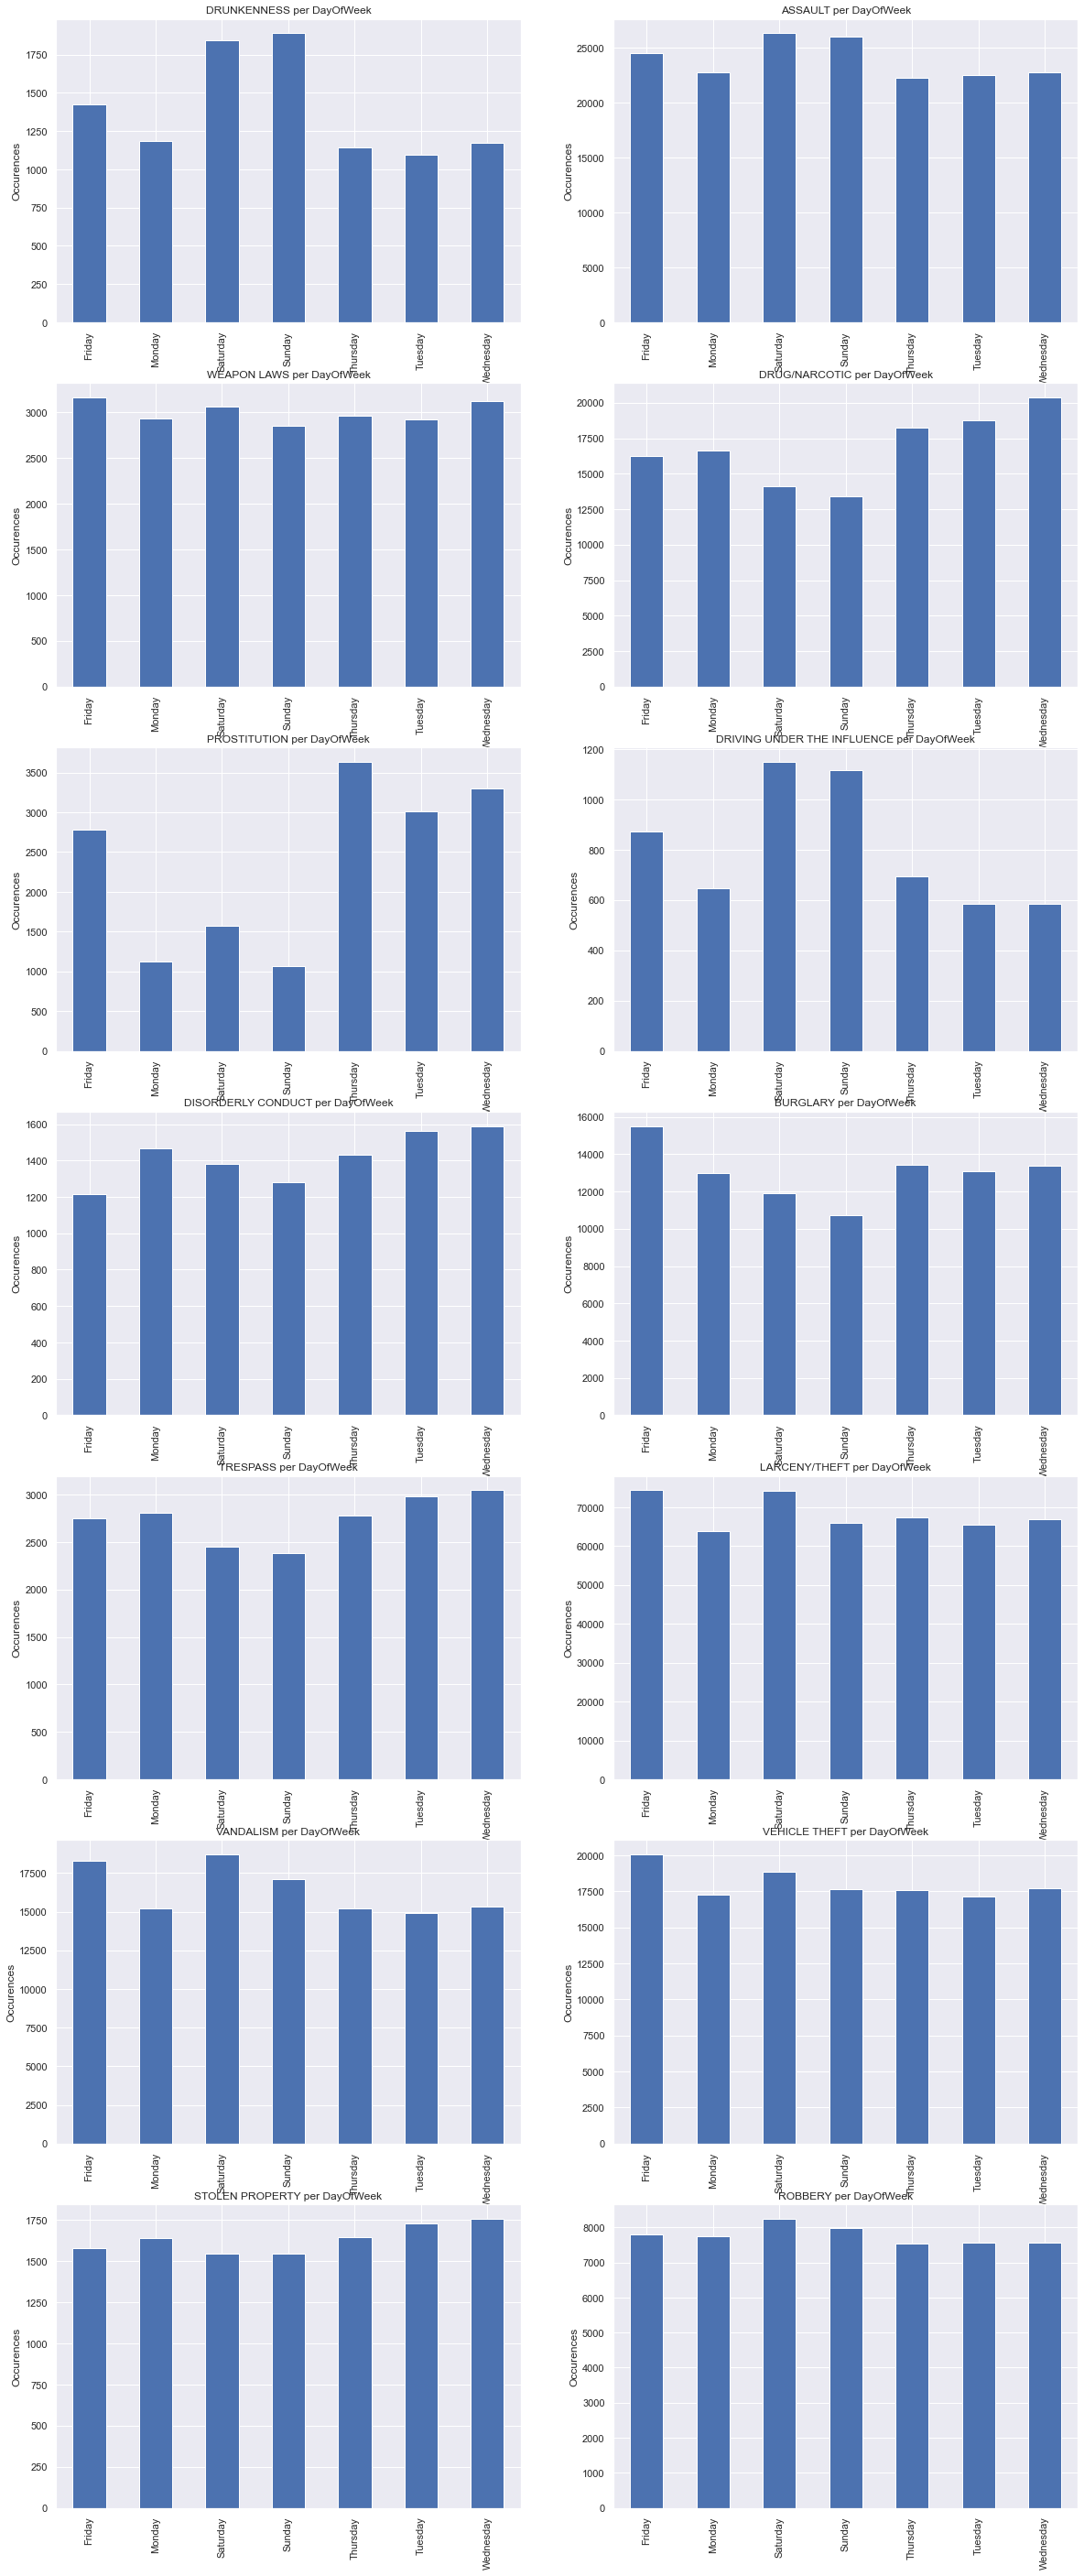

In [7]:
def temporalcrimesplot(crime, temporal='month'): # temporal = 'month' or 'hour' or 'DayOfWeek' or 'DoWhour'
    val_count = df[temporal][df.Category == crime].value_counts().sort_index().plot(kind='bar')
    plt.ylabel('Occurences')
    plt.title(f'{crime} per {temporal}')

# Use the function for DayOfWeek-plot
plt.figure(figsize=(20,50))
plt.title("Crime per weekday")
for i, crime in enumerate(focuscrimes):
    plt.subplot(int(N/2), 2,  i+1)
    temporalcrimesplot(crime, temporal='DayOfWeek')

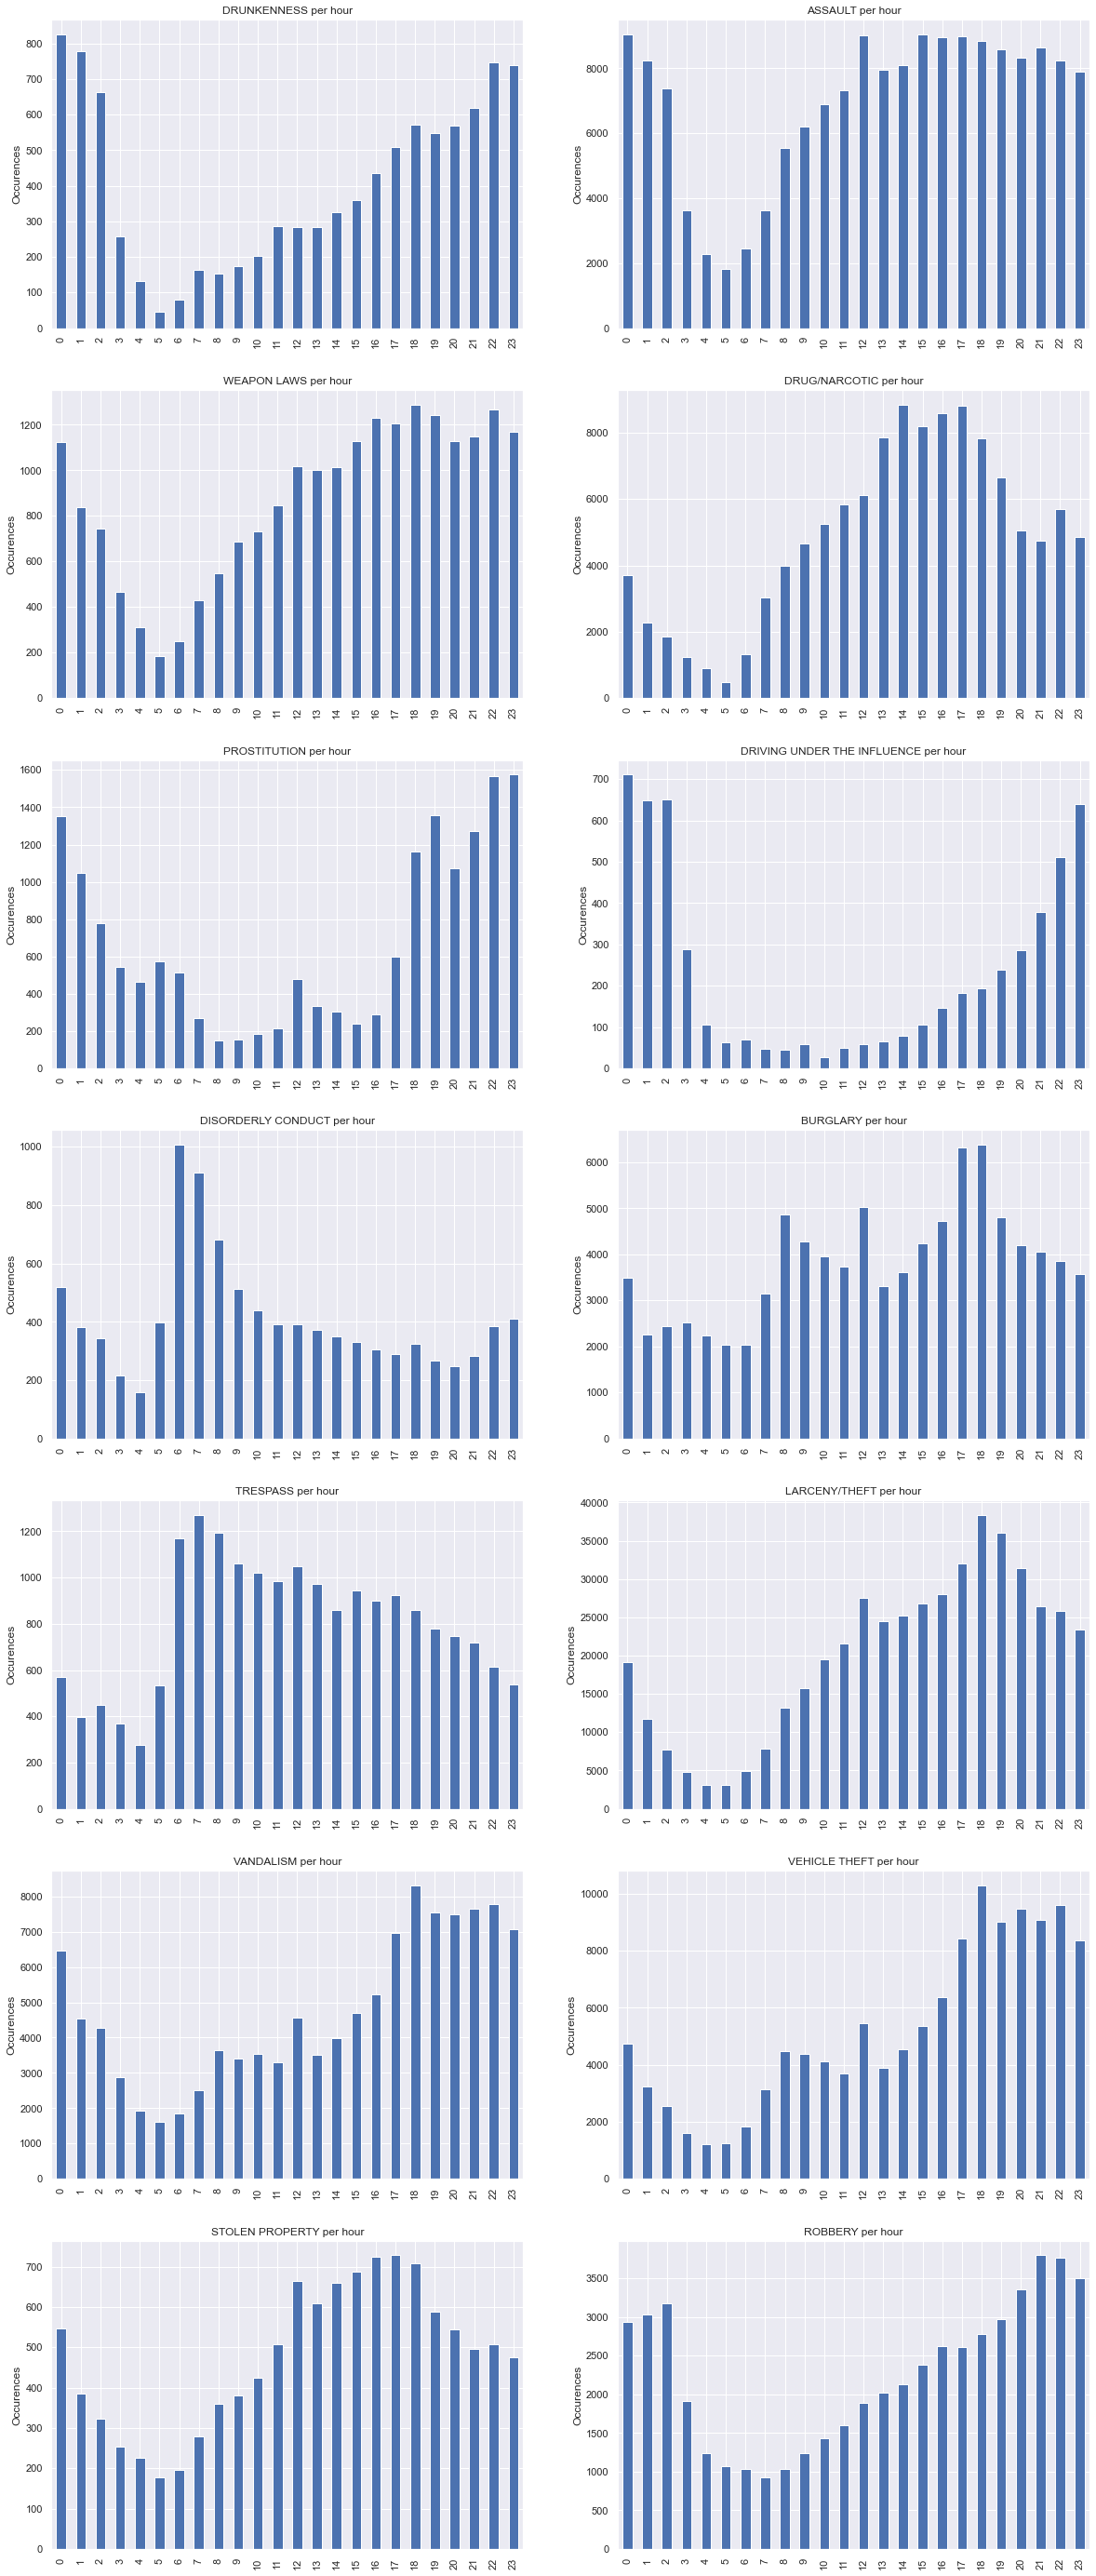

In [8]:
# Use the function for 24-hour plot
plt.figure(figsize=(20,50))
plt.title("Crime per weekday")
for i, crime in enumerate(focuscrimes):
    plt.subplot(int(N/2), 2,  i+1)
    temporalcrimesplot(crime, temporal='hour')

Det er da nogle ret fede plots :-) - der er nogle meget tydelige daglige tendenser

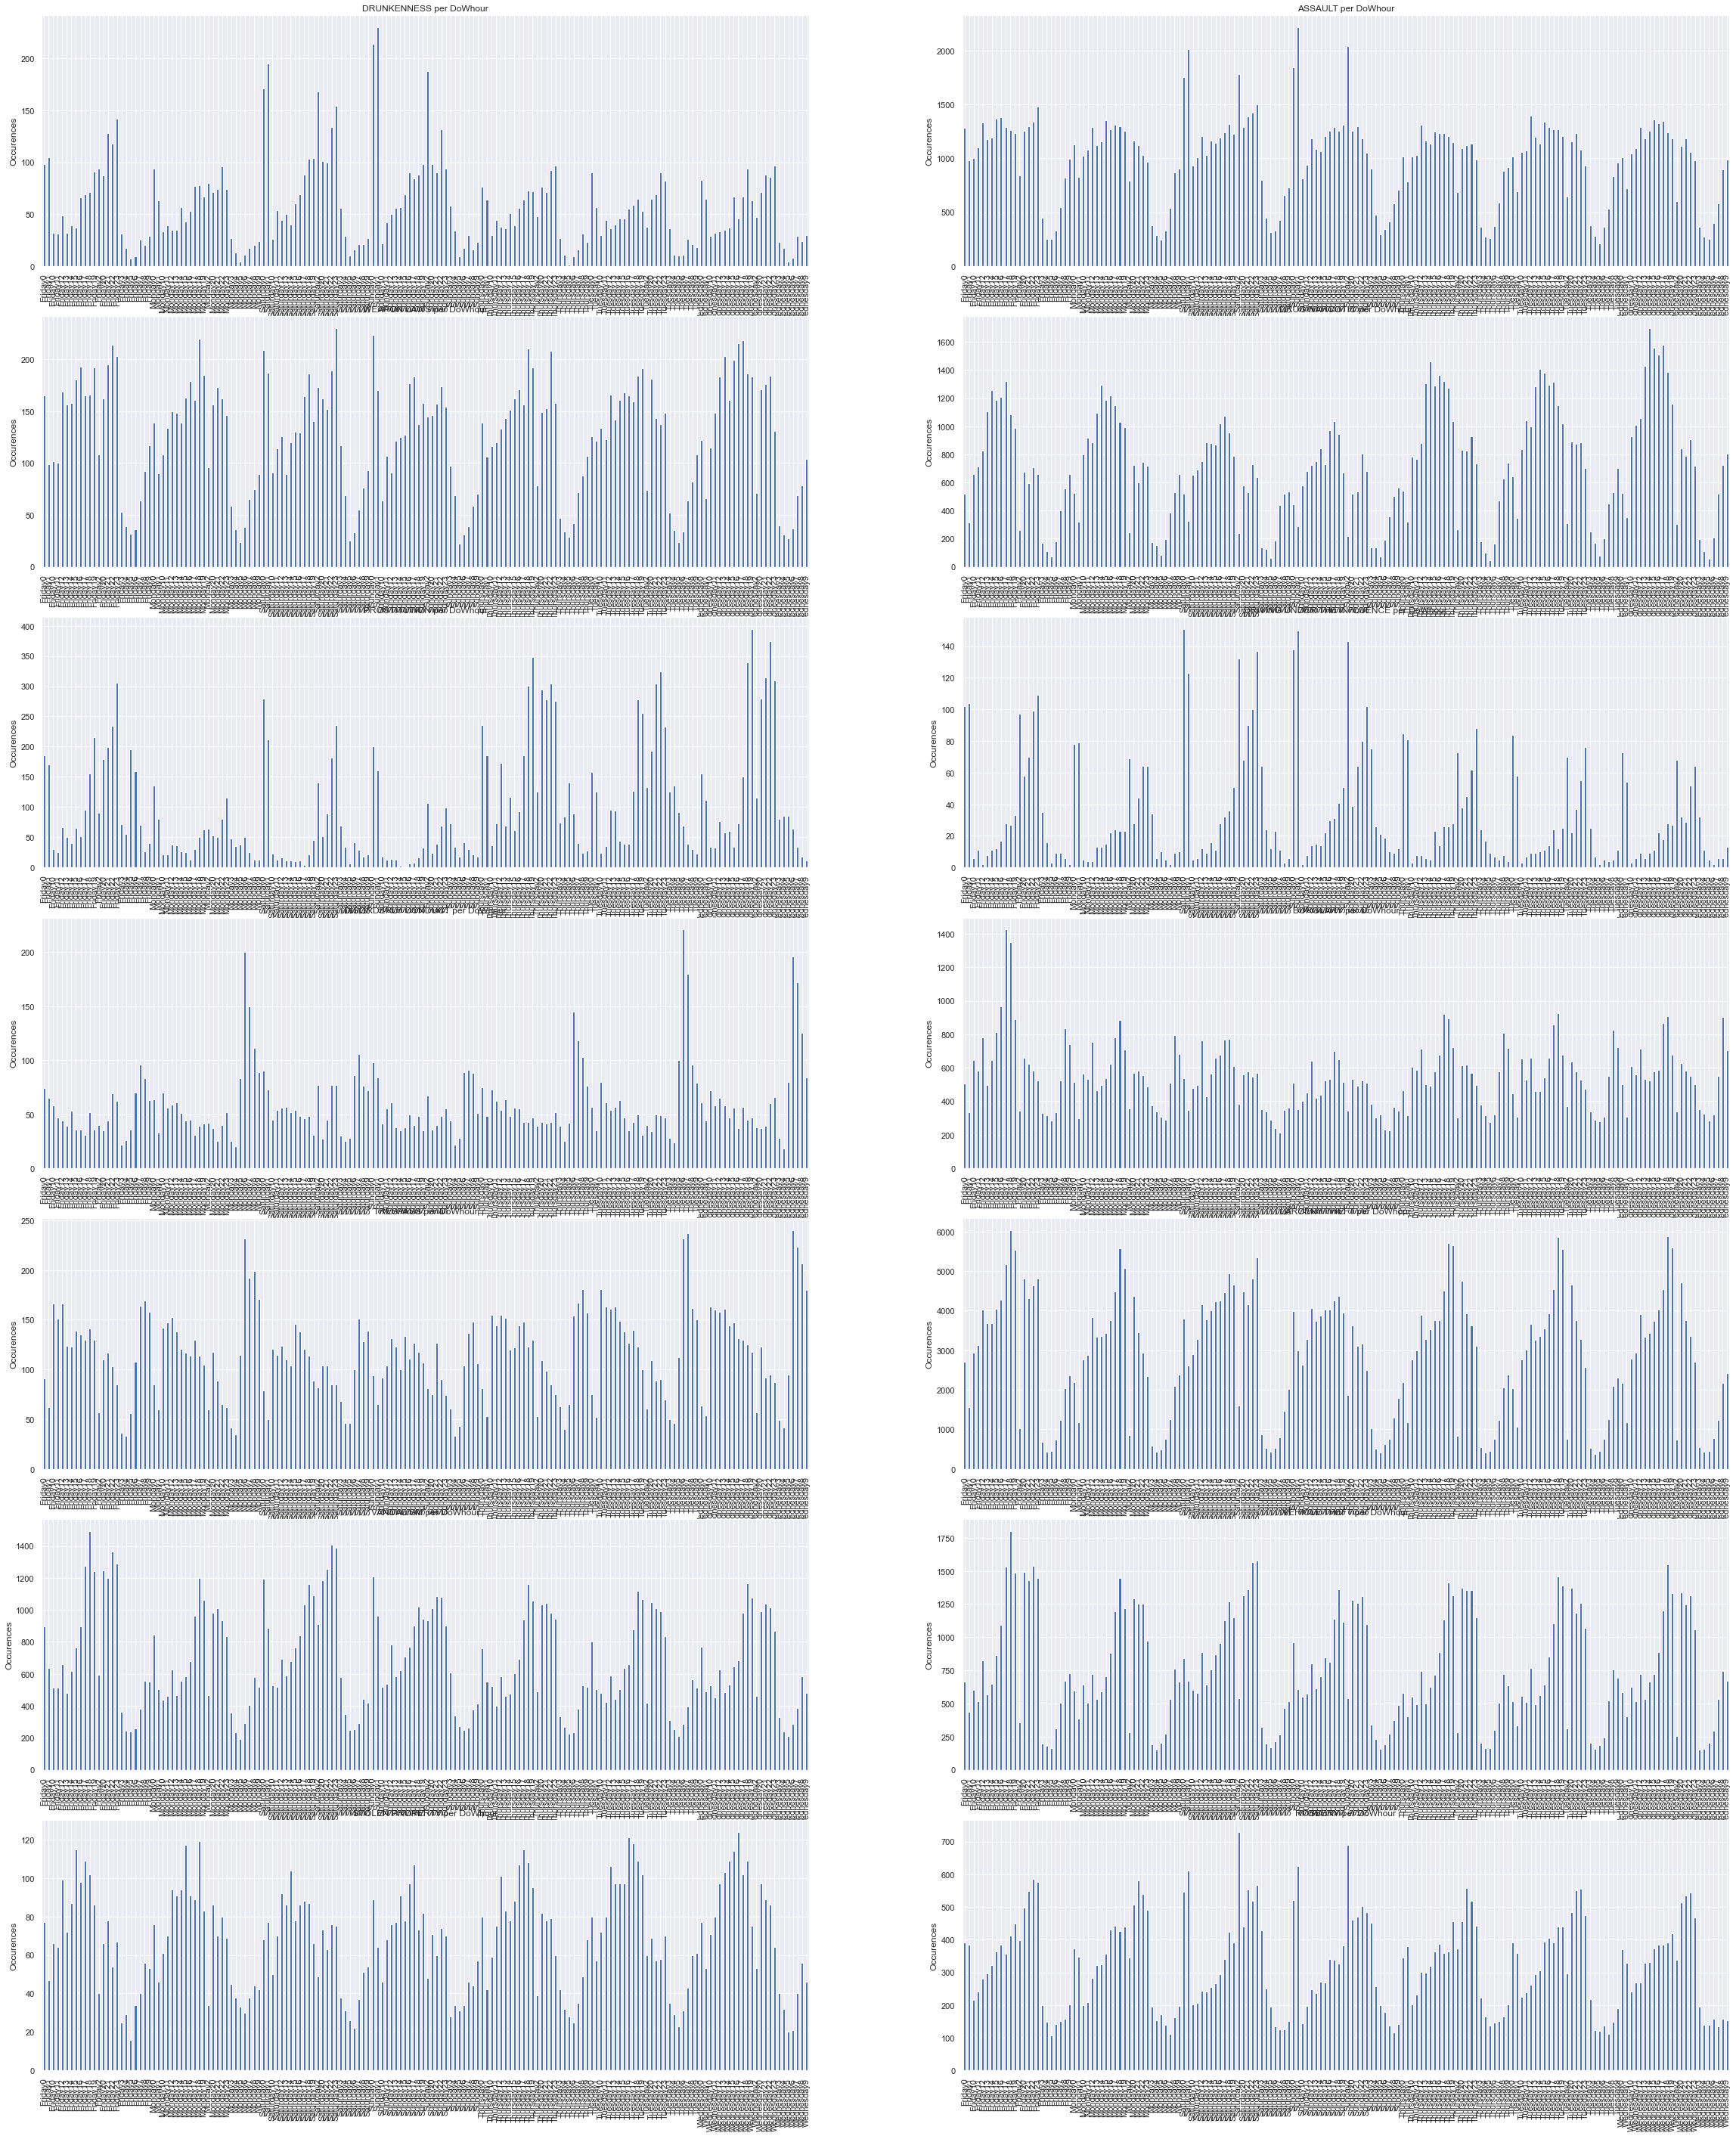

In [9]:
# Use the function for 168-hour (DayOfWeek-hour) plot
plt.figure(figsize=(40,50))
plt.title("Crime per weekday")
for i, crime in enumerate(focuscrimes):
    plt.subplot(int(N/2), 2,  i+1)
    temporalcrimesplot(crime, temporal='DoWhour')

The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco.

> *Exercise 2.2*: The types of crime and how they take place across San Francisco's police districts.
>  
>  * So now we'll be combining information about `PdDistrict` and `Category` to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.
>  * Which has the most crimes? Which has the most focus crimes?
>  * Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going:
>    - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png). Let's call it `P(crime)`.
>    - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.
>    - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.
>    - For each district plot these ratios for the 14 focus crimes. My plot looks like this
> ![Histograms](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/conditional.png "histograms")
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia?

**Comment**. Notice how much awesome datascience (i.e. learning about interesting real-world crime patterns) we can get out by simply counting and plotting (and looking at ratios). Pretty great, right? However, when generating meaningful visualizations, we need to be wary of *perceptual errors*. We'll have a look at this in the final exercise while also having fun with some geodata!

In [10]:
Pds = df.PdDistrict.dropna().unique()
print(f'Police districts: {Pds}')
print('Districts with most crimes: \n')
print(D.PdDistrict.value_counts())

print('\n Districts with most focus crimes:')
print(df.PdDistrict.value_counts())


Police districts: ['SOUTHERN' 'NORTHERN' 'CENTRAL' 'TARAVAL' 'BAYVIEW' 'MISSION' 'RICHMOND'
 'PARK' 'INGLESIDE' 'TENDERLOIN']
Districts with most crimes: 

SOUTHERN      390692
MISSION       288985
NORTHERN      266435
CENTRAL       221923
BAYVIEW       205480
TENDERLOIN    186954
INGLESIDE     181092
TARAVAL       155461
PARK          119698
RICHMOND      112804
Name: PdDistrict, dtype: int64

 Districts with most focus crimes:
SOUTHERN      226805
NORTHERN      172194
MISSION       162971
CENTRAL       139961
BAYVIEW       112054
TENDERLOIN    104950
INGLESIDE     101328
TARAVAL        88132
PARK           67645
RICHMOND       66770
Name: PdDistrict, dtype: int64


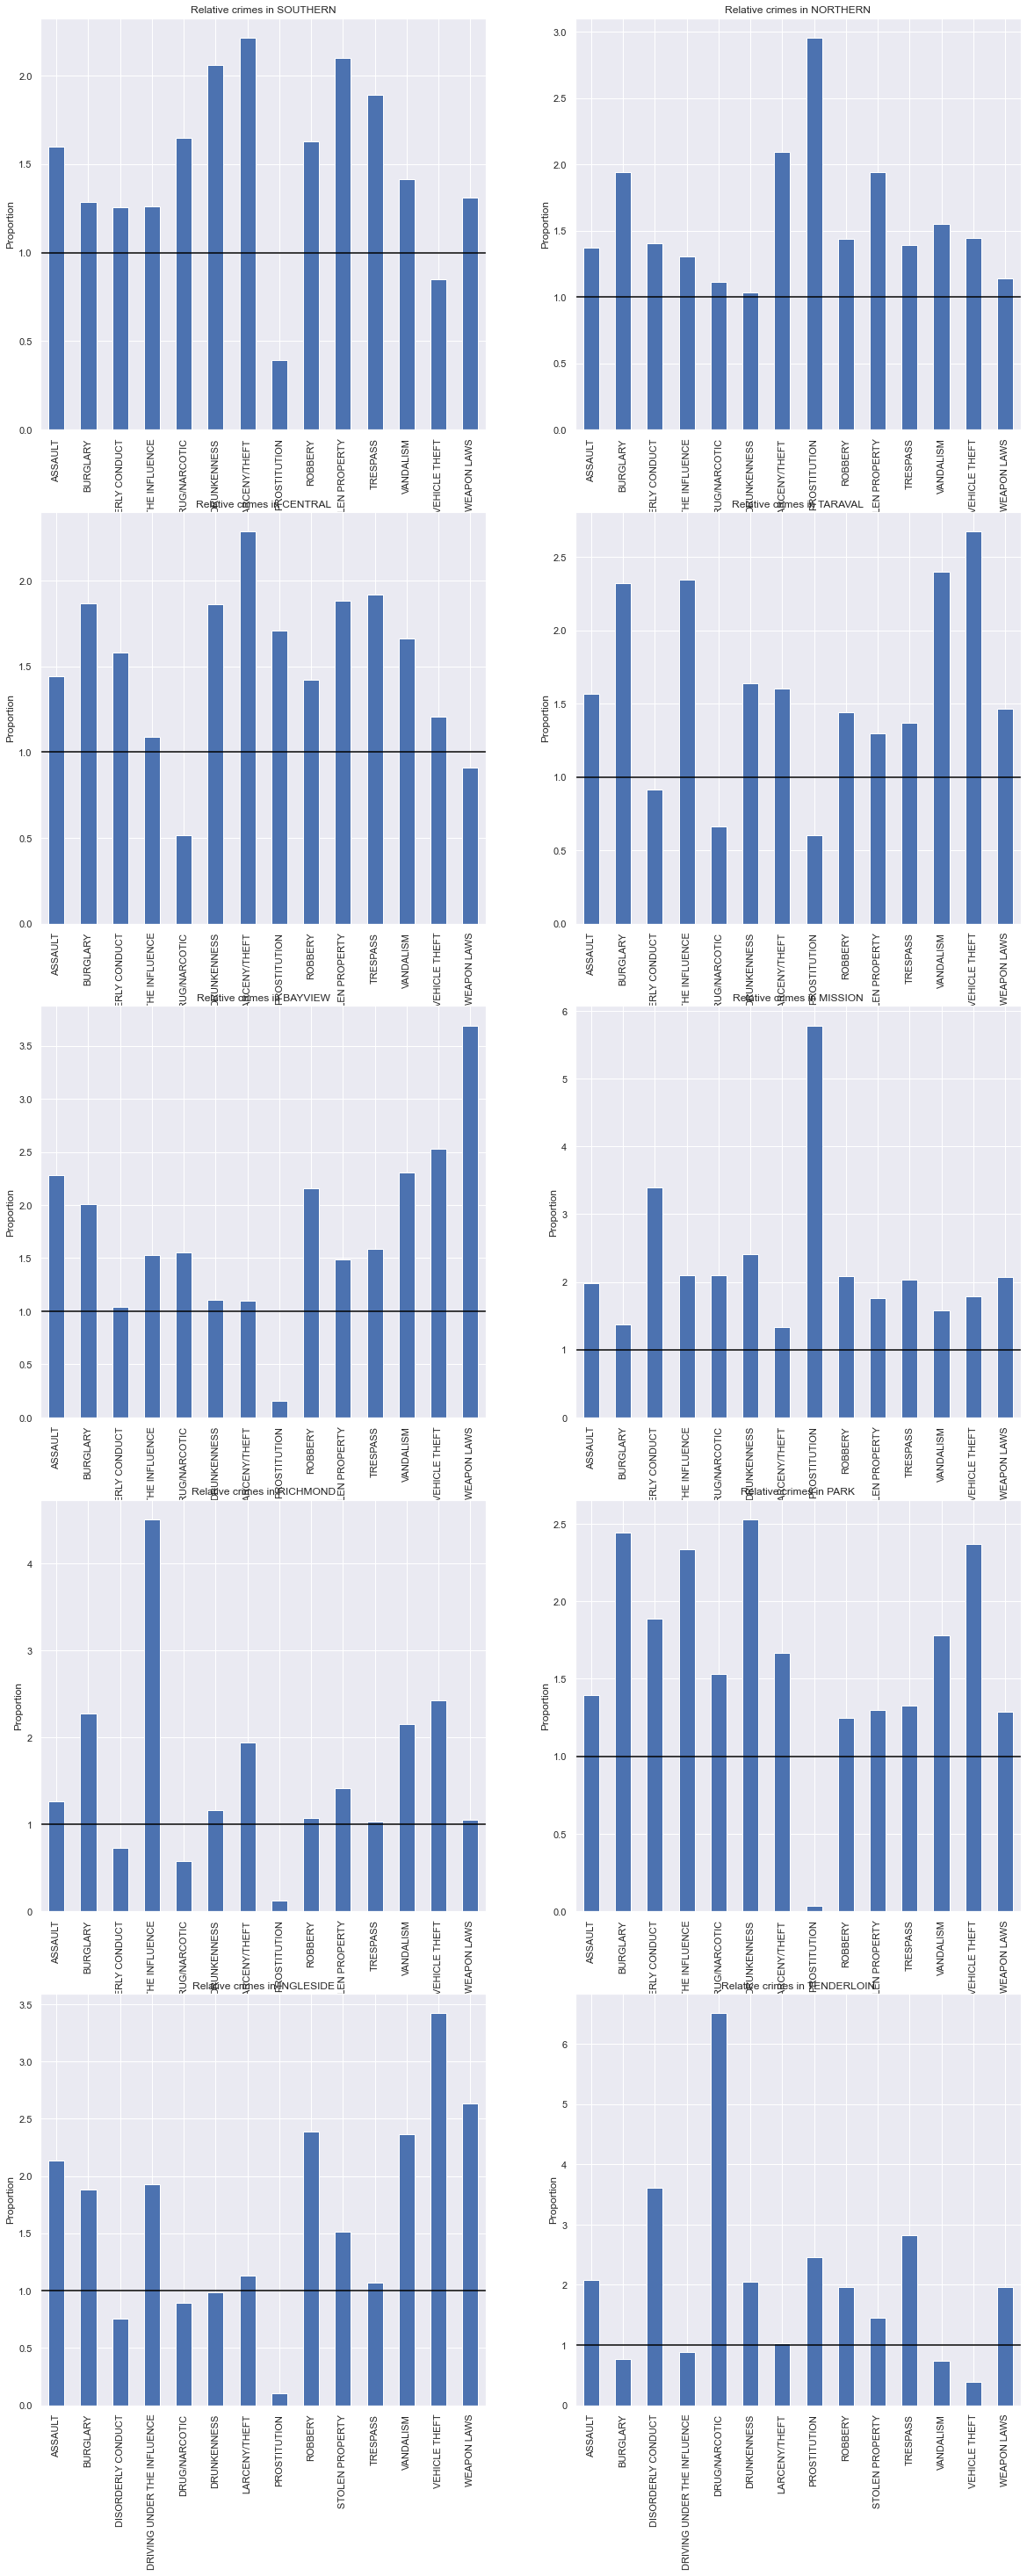

In [11]:
# P(crime)
pcrime = df.Category.value_counts() / n

# P(crime | district)
def relative_crimetype_plot(district):
    val_count = df['Category'][df.PdDistrict == district].value_counts().sort_index()
    rel = val_count / val_count.sum() / pcrime
    rel.plot(kind='bar')
    plt.axhline(y=1,color='black')
    plt.ylabel('Proportion')
    plt.title(f'Relative crimes in {district}');

plt.figure(figsize=(20,50))
for i, district in enumerate(Pds):
    plt.subplot(5, 2,  i+1)
    relative_crimetype_plot(district)

## Part 3: Visualizing geodata with Plotly

So visualizing geodata used to be difficult, but with `Plotly` things have gotten easier. 

Like matplotlib, Plotly is an [open-source data visualization library](https://plotly.com/python/), but it's aimed at making interactive visualizations that can be rendered in a web browser (or jupyter notebook). You can read about it and learn how to install it [here](https://plotly.com/python/getting-started/).

That means that we can easily draw on the fact that the crime data has lots of exciting geo-data attached. The map we're going to be creating is called a **[choropleth map](https://en.wikipedia.org/wiki/Choropleth_map)** (more on these later), which is basically a map, where we color in shapefiles (more on this below) based on some value that we care about. We'll take our inspiration from Plotly's gentle intro to [Choropleth maps](https://plotly.com/python/mapbox-county-choropleth/)

The thing we want to look into is the SF police districts, shown below (image stolen from [this page](https://hoodline.com/2015/07/citywide-sfpd-redistricting-to-take-effect-sunday/)).

![districts from web](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/sfpdfinal.png)

But because we are cool programmers, we want to create our own maps, **with our own information on them**. Let's do it!

> *Exercise 3a*: Let's plot a map with some random values in it.
>
> What we need to do to get going is to create some random data. Below is a little dictionary with a random value for each district that you can use if you want your plots to look like mine.

In [140]:
randomdata = {'CENTRAL': 0.8903601342256143,
 'SOUTHERN': 0.8642882941363439,
 'BAYVIEW': 0.925634097746596,
 'MISSION': 0.7369022697287458,
 'PARK': 0.9864113307070926,
 'RICHMOND': 0.5422239624697017,
 'INGLESIDE': 0.5754056712571605,
 'TARAVAL': 0.5834730737348696,
 'NORTHERN': 0.08148199528212985,
 'TENDERLOIN': 0.37014287986350447};

#dfrand = pd.DataFrame([randomdata.keys(), randomdata.values()]).transpose();dfrand
dfrand = pd.DataFrame(randomdata.items(), columns=['DISTRICT', "value"]); dfrand
#dfrand = pd.DataFrame.from_dict(randomdata, orient='index', columns=['DISTRICT', 'VALUES']); dfrand
#dfrand = pd.DataFrame(randomdata); dfrand

,DISTRICT,value
0,CENTRAL,0.890360
1,SOUTHERN,0.864288
2,BAYVIEW,0.925634
3,MISSION,0.736902
4,PARK,0.986411
5,RICHMOND,0.542224
6,INGLESIDE,0.575406
7,TARAVAL,0.583473
8,NORTHERN,0.081482
9,TENDERLOIN,0.370143


> *Exercise 3a* continued:
>
> For this exercise, we'll use use the random values above and we'll also need some *shape-files*.
> [Shapefiles can have many different formats](https://en.wikipedia.org/wiki/Shapefile). Because we are brilliant teachers and an all-round standup people, we are sharing the shapefiles as [`geojson`](https://en.wikipedia.org/wiki/GeoJSON), which is an easy-to-use format for shapefiles based on `json`.
>
> * Download the SFPD District shapefiles **[here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson)**
> * Now that you have the shapefiles, you can follow the example here: https://plotly.com/python/mapbox-county-choropleth/ but with the following modifications:
>    * In the example the `id` is a so-called FIPS code. In our case the `id` is the `DISTRICT`
>    * You will have to convert the dictionary of random values I included above to a Pandas dataframe with the right column headings.
>    * The data used in the example has a range between zero and 12. Your data is between $[0,1]$. So you'll need to modify the plotting command to accound for that change.
>    * You should also change the map to display the right zoom level.
>    * And the map should center on San Francisco's `lat` and `lon`.
> * Now you can create your map.

Mine looks something like this.

![map_example.png](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/map_example.png)

You're encouraged to play around with other settings, color schemes, etc.

In [141]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    counties = json.load(response)

counties['features'][0]

{'type': 'Feature',
 'properties': {'OBJECTID': 1, 'DISTRICT': 'CENTRAL', 'COMPANY': 'A'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-122.40532134644249, 37.806867516866724],
    [-122.40440122046421, 37.80885380837723],
    [-122.40438743872008, 37.80886519707406],
    [-122.40436730880846, 37.808872966044206],
    [-122.40434376667437, 37.808869624109605],
    [-122.40431429421082, 37.80881799170733],
    [-122.40394067997407, 37.80876198999871],
    [-122.40392016838871, 37.808754877186864],
    [-122.40390555965932, 37.808734021463344],
    [-122.40390814512642, 37.80871288836611],
    [-122.40471878715235, 37.80696905969842],
    [-122.4039597318324, 37.80657809724],
    [-122.4027673862454, 37.80801170771318],
    [-122.40274578869823, 37.80802322234157],
    [-122.40271771623641, 37.80802615647638],
    [-122.40269398350013, 37.80801537335998],
    [-122.40235483855216, 37.8078397060222],
    [-122.40234023023558, 37.80781885013204],
    [-122.40234106239043, 37.80779

In [142]:
import plotly.express as px

fig = px.choropleth_mapbox(dfrand, geojson=counties, locations='DISTRICT', color='value',
                           color_continuous_scale="Viridis",
                           range_color=(0, 1),
                           mapbox_style="carto-positron",
                           zoom=10.5, center = {"lat": 37.773972, "lon": -122.431297},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

> *Exercise 3b:* But it's crime-data. Let's do something useful and **visualize where it is safest to leave your car on a Sunday**.
> 
> Take a moment to congratulate yourself. You now know how to create cool plots!
> * Now, we can focus on our main goal: *determine the districts where you should (and should not) leave your car on Sundays*. (Or stated differently, count up the number of thefts.)
> * To do so, first:
>  * Filter the crime dataset by the `DayOfWeek` category and also choose the appropriate crime category.
>  * Aggregate data by police district.
> * To create the plot, remember that your range of data-values is different from before, so you'll have to change the plotly command a bit.
> * **Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?**
> * Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. *perceptual errors*):
>    * Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident? 
>    * Why do you think perceptual errors are a problem? Try to think of a few examples. You can have a look at this [article](https://www.businessinsider.com/fox-news-obamacare-chart-2014-3?r=US&IR=T) to get some inspiration.
> * *Try this for Extra credit:*
>     * Create plots for the same crime type, but different days, and comment on the results.

> # MY ANSWER

Best place to park on Sunday: TENDERLOIN (or generally nothern part of SF)

Worst: INGLESIDE (or generally southern part of SF)


In [158]:
D.Category.unique()[:10]

array(['LARCENY/THEFT', 'ASSAULT', 'MISSING PERSON', 'VEHICLE THEFT',
       'BURGLARY', 'DRUG/NARCOTIC', 'DRIVING UNDER THE INFLUENCE',
       'VANDALISM', 'OTHER OFFENSES', 'DRUNKENNESS'], dtype=object)

In [159]:
Choropleth('Monday', 'DRUNKENNESS')
print('Lets see where the party is happening')

Lets see where the party is happening
